<a href="https://colab.research.google.com/github/sibot89/Data-Science/blob/main/CarPricePredict_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Used Cars Price.csv to Used Cars Price.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
raw_data = pd.read_csv('Used Cars Price.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [ ]:
data.isnull().sum()

,0
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine Type,0
Registration,0
Year,0


In [ ]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


<ipython-input-9-0f962cd3c2b4>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_no_mv['Price'], shade=True, legend=False)


<Axes: xlabel='Price', ylabel='Density'>

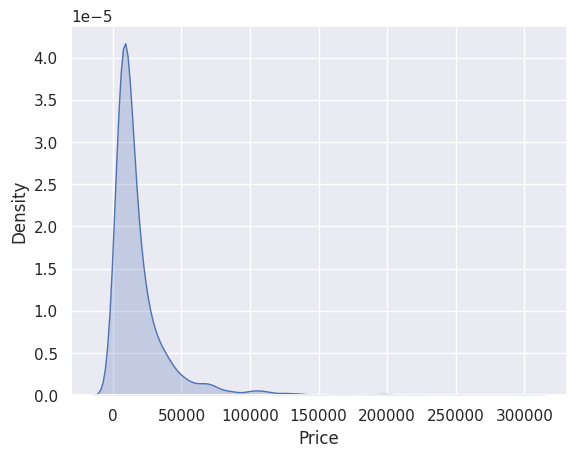

In [ ]:
sns.kdeplot(data_no_mv['Price'], shade=True, legend=False)

In [ ]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<ipython-input-11-3693ba82d4b1>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_1['Price'],shade=True)


<Axes: xlabel='Price', ylabel='Density'>

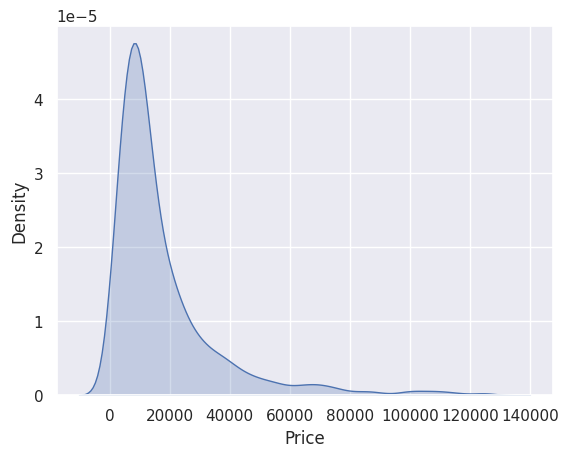

In [ ]:
sns.kdeplot(data_1['Price'],shade=True)

<ipython-input-12-1661c1c55118>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_no_mv['Mileage'], shade=True)


<Axes: xlabel='Mileage', ylabel='Density'>

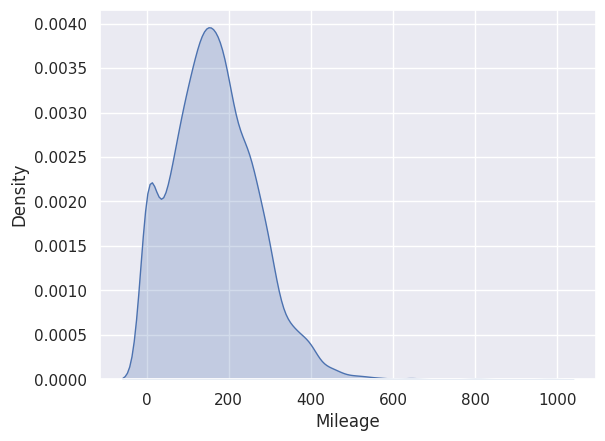

In [ ]:
sns.kdeplot(data_no_mv['Mileage'], shade=True)

<ipython-input-13-f2e3fb9f8169>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_2['Mileage'],shade=True)


<Axes: xlabel='Mileage', ylabel='Density'>

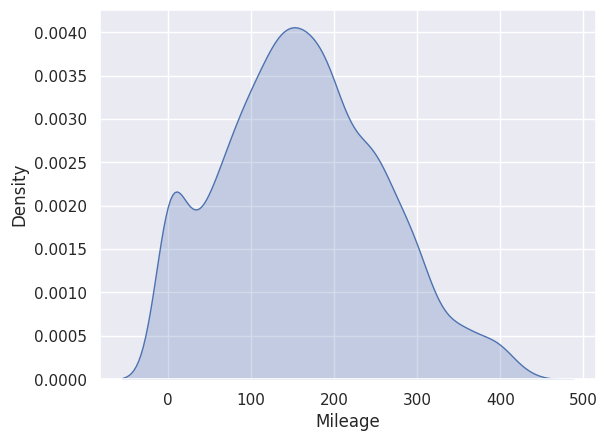

In [ ]:
q = data_no_mv['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.kdeplot(data_2['Mileage'],shade=True)

<ipython-input-14-3d0f4341f897>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_2['EngineV'], shade=True)


<Axes: xlabel='EngineV', ylabel='Density'>

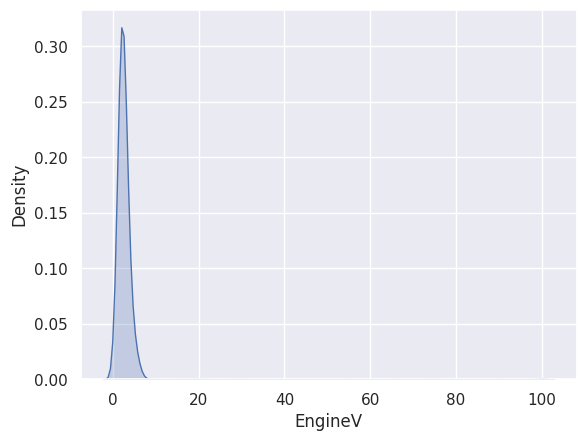

In [ ]:
sns.kdeplot(data_2['EngineV'], shade=True)

<ipython-input-15-c82585b4d539>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_3['EngineV'],shade=True)


<Axes: xlabel='EngineV', ylabel='Density'>

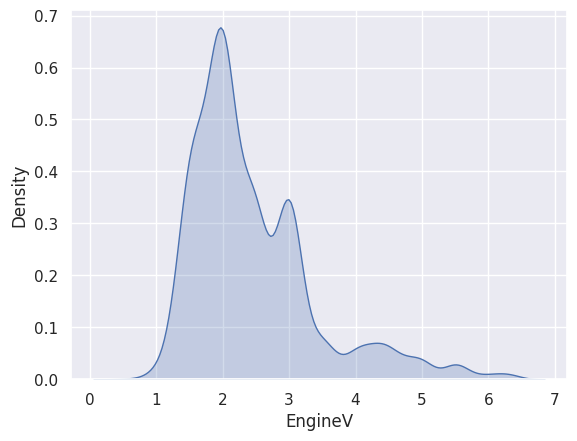

In [ ]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.kdeplot(data_3['EngineV'],shade=True)

<ipython-input-16-cae86d6027f2>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_3['Year'],shade=True)


<Axes: xlabel='Year', ylabel='Density'>

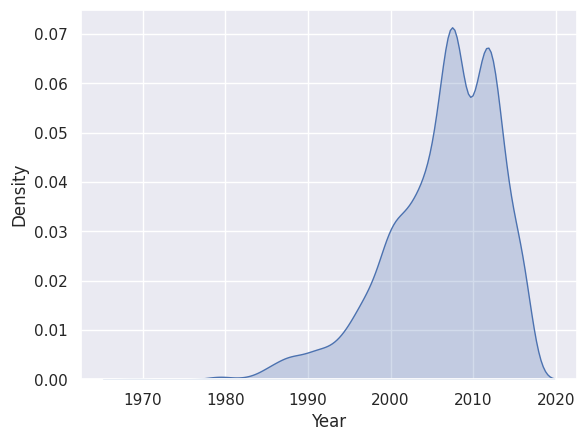

In [ ]:
sns.kdeplot(data_3['Year'],shade=True)
# plt.plot(data_3['Year'],data_3['Price'],'o')
# plt.show()

<ipython-input-17-4d189bca4830>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_4['Year'],shade=True)


<Axes: xlabel='Year', ylabel='Density'>

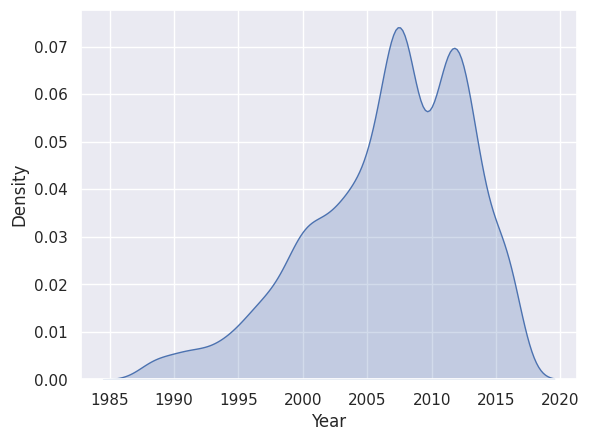

In [ ]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.kdeplot(data_4['Year'],shade=True)

In [ ]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


Checking Linearity In Data

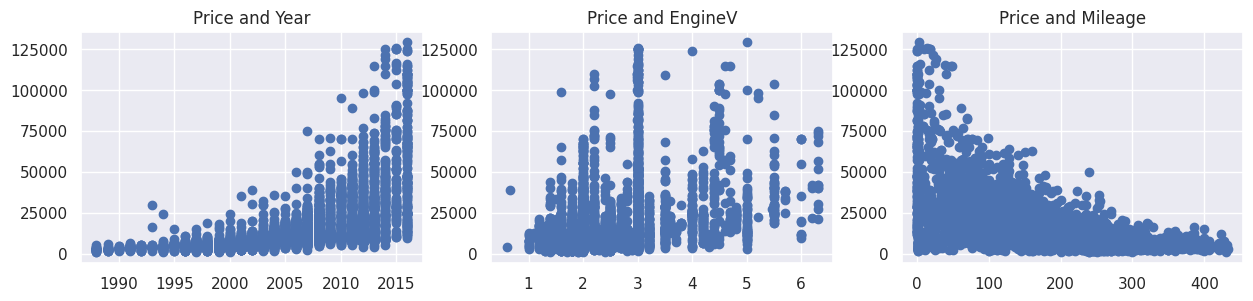

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [ ]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned_2 = data_cleaned.drop(['Price'], axis=1)
data_cleaned_2.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


Checking Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned_2[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

vif

,VIF,features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


vif factor for Year is bigger than 10, so we should remove that

In [ ]:
data_no_multicollinearity = data_cleaned_2.drop(['Year'], axis=1)
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


**Creating Dummy Variables**

In [ ]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

Reorder the Columns

In [ ]:
new_columns = ['log_price','Mileage','EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [ ]:
data_preprocessed = data_with_dummies[new_columns]

Creating the Linear Regression Model

In [ ]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

Standardizing

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

split into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_hat = reg.predict(x_train)

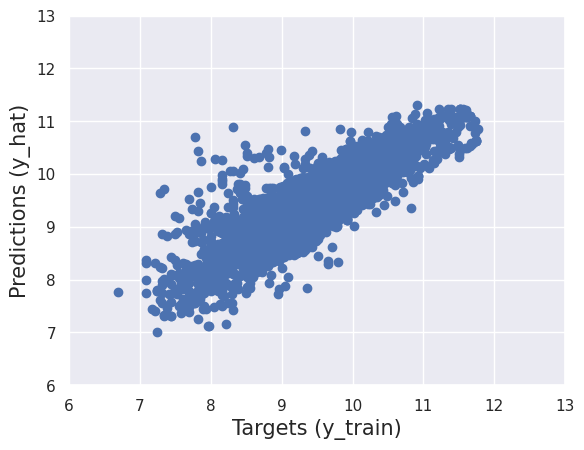

In [ ]:
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=15)
plt.ylabel('Predictions (y_hat)',size=15)

plt.xlim(6,13)
plt.ylim(6,13)

plt.show()

<ipython-input-39-282f3e796c90>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train - y_hat, shade=True)


Text(0.5, 1.0, 'Residual PDF')

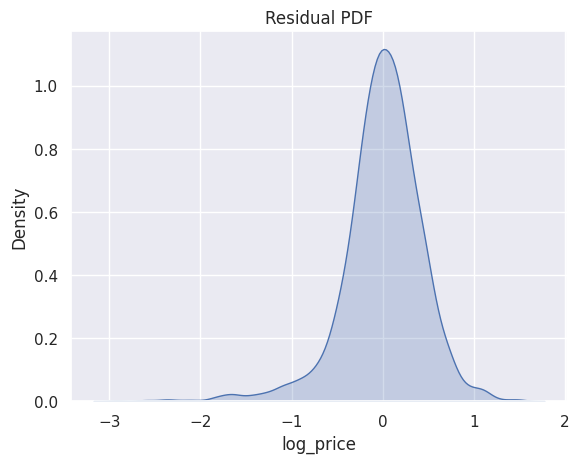

In [ ]:
sns.kdeplot(y_train - y_hat, shade=True)
plt.title("Residual PDF")

In [ ]:
#calculating R_squared
reg.score(x_train, y_train)

0.752798334452781

R_squared = 0.75, so our model can represent 75% of data

In [ ]:
reg.intercept_

np.float64(9.417655717209573)

In [ ]:
reg.coef_

array([-0.45954324,  0.21949194,  0.01040878,  0.00286894, -0.14016001,
       -0.18442074, -0.06467445, -0.09142259, -0.14072592, -0.09761333,
       -0.18770557, -0.11970774, -0.15476602, -0.12318859, -0.03168792,
       -0.15364747,  0.32075575])

In [ ]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.459543
1,EngineV,0.219492
2,Brand_BMW,0.010409
3,Brand_Mercedes-Benz,0.002869
4,Brand_Mitsubishi,-0.140160
5,Brand_Renault,-0.184421
6,Brand_Toyota,-0.064674
7,Brand_Volkswagen,-0.091423
8,Body_hatch,-0.140726
9,Body_other,-0.097613


Testing the Model

In [ ]:
y_hat_test = reg.predict(x_test)

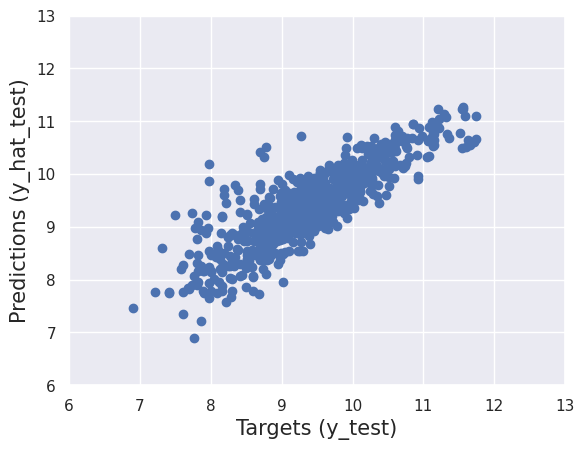

In [ ]:
plt.scatter(y_test, y_hat_test)

plt.xlabel('Targets (y_test)',size=15)
plt.ylabel('Predictions (y_hat_test)',size=15)

plt.xlim(6,13)
plt.ylim(6,13)

plt.show()

In [ ]:
#for calculating the price we should apply exp function
df_performance  = pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])

#reset indexes
y_test = y_test.reset_index(drop=True)

df_performance['Targets'] = np.exp(y_test)

In [ ]:
df_performance.describe()

,Predictions,Targets
count,774.000000,774.000000
mean,15812.217948,17578.888049
std,12659.144309,18815.033589
min,985.723993,999.000000
25%,7695.223043,6950.000000
50%,12007.357548,11350.000000
75%,19707.235037,20375.000000
max,78814.055618,125000.000000


In [ ]:
df_performance['Residual'] = df_performance['Targets'] - df_performance['Predictions']
df_performance['Percent Error'] = np.absolute(df_performance['Residual']/df_performance['Targets']*100)
df_performance

,Predictions,Targets,Residual,Percent Error
0,11378.649686,9900.00,-1478.649686,14.935855
1,19177.305811,22800.00,3622.694189,15.889010
2,5622.731436,3250.00,-2372.731436,73.007121
3,37383.085342,46900.00,9516.914658,20.291929
4,7220.542932,5400.00,-1820.542932,33.713758
5,21895.208107,24000.00,2104.791893,8.769966
6,4712.361764,3400.00,-1312.361764,38.598875
7,8126.466000,9200.00,1073.534000,11.668848
8,41755.921634,55500.00,13744.078366,24.764105
9,78814.055618,104000.00,25185.944382,24.217254


In [ ]:
pd.options.display.max_rows = 999
df_performance.sort_values(by=['Percent Error'], inplace=True)
np.round(df_performance, 3)

,Predictions,Targets,Residual,Percent Error
313,9886.511,9900.00,13.489,0.136
22,20942.486,21000.00,57.514,0.274
469,7019.775,6999.00,-20.775,0.297
228,3967.257,3950.00,-17.257,0.437
767,16477.965,16555.00,77.035,0.465
175,25376.902,25500.00,123.098,0.483
114,32329.289,32500.00,170.711,0.525
95,7552.578,7500.00,-52.578,0.701
314,35763.122,35500.00,-263.122,0.741
750,8732.640,8800.00,67.360,0.765


In [ ]:
np.round(reg_summary, 2)

,Features,Weights
0,Mileage,-0.46
1,EngineV,0.22
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,0.00
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.09
8,Body_hatch,-0.14
9,Body_other,-0.10
